In [330]:
import numpy as np
from scipy.linalg import lstsq
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

# My custom Linear Regression

In [331]:
Y = np.array([651, 762, 853, 1062, 1190, 1293])
Y = Y[:, np.newaxis]

In [332]:
Y

array([[ 651],
       [ 762],
       [ 853],
       [1062],
       [1190],
       [1293]])

In [333]:
X = np.array([25, 28, 35, 40, 46, 53])
X = X[:, np.newaxis]

In [334]:
X

array([[25],
       [28],
       [35],
       [40],
       [46],
       [53]])

## Manipulate X, X_offset, X_scale

In [335]:
X_mean = np.average(X, axis=0, weights=None)

In [336]:
X_mean

array([37.83333333])

In [337]:
_X = X - X_mean

In [338]:
_X

array([[-12.83333333],
       [ -9.83333333],
       [ -2.83333333],
       [  2.16666667],
       [  8.16666667],
       [ 15.16666667]])

In [339]:
X_scale = np.ones(_X.shape[1], dtype=X.dtype)

In [340]:
X_scale

array([1])

## Manipulate Y, Y_offset

In [341]:
Y_mean = np.average(Y, axis=0, weights=None)

In [342]:
Y_mean

array([968.5])

In [343]:
_Y = Y - Y_mean

In [344]:
_Y

array([[-317.5],
       [-206.5],
       [-115.5],
       [  93.5],
       [ 221.5],
       [ 324.5]])

## Find coefficient

### To find coefficient follow structure:
        _X = X - X_mean
        _Y = Y - Y_mean
        coef = np.sum(_X * _Y) / np.sum(np.power(_X, 2))

In [345]:
np.sum(_X * _Y) / np.sum(np.power(_X, 2))

23.414014598540145

### Or use scipy.linalg.lstsq to find coefficient

In [346]:
coef, residues, rank, singular = lstsq(_X, _Y)

In [347]:
coef

array([[23.4140146]])

## Find intercept

### To find intercept follow structure:   
        intercept = Y_mean - coef * X_mean

In [348]:
coef = coef / X_scale
intercept = Y_mean - np.dot(coef.T, X_mean) 

In [349]:
intercept

array([82.66978102])

## Plot model

### Calculate Y_pred

In [350]:
Y_pred = intercept + coef * X

### Plot

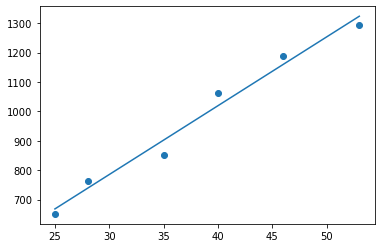

In [351]:
plt.scatter(X, Y, marker='o')
plt.plot(X, Y_pred)
plt.show()

## Calculate Root Mean Squared Error (RMSE)

In [352]:
np.sqrt(mean_squared_error(Y, Y_pred))

34.04283547535291

# Linear Regression using Sklearn

In [353]:
# Using linear regression
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression()

In [354]:
model.coef_

array([[23.4140146]])

In [355]:
model.intercept_

array([82.66978102])

In [356]:
y = model.predict(X)

In [357]:
y

array([[ 668.02014599],
       [ 738.26218978],
       [ 902.16029197],
       [1019.23036496],
       [1159.71445255],
       [1323.61255474]])

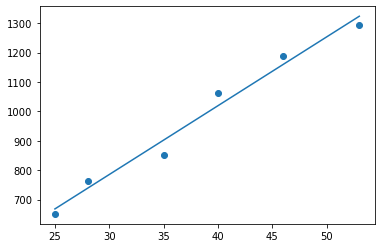

In [358]:
plt.scatter(X, Y, marker='o')
plt.plot(X, y)
plt.show()

In [359]:
# find RMSE:
np.sqrt(mean_squared_error(Y, y))

34.04283547535291